<a href="https://colab.research.google.com/github/jfsalzmann/joffpype/blob/master/share/ML_Problem_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Names: 
- Juan Brasdefer
- Johann-Friedrich Salzmann
- Niklas Pawelzik

Create a decision tree classifier with a maximum depth of 2 levels and fit the training data. Once this classifier is trained, plot the data and the decision boundary to see the benefit of increasing the depth. To plot the decision tree.

In [ ]:
# Use this data
import numpy as np
import pandas as pd

penguins = pd.read_csv("penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

In [ ]:

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)

tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=2)

Did we make use of the feature “Culmen Length”? Plot the tree using the function sklearn.tree.plot_tree to find out!



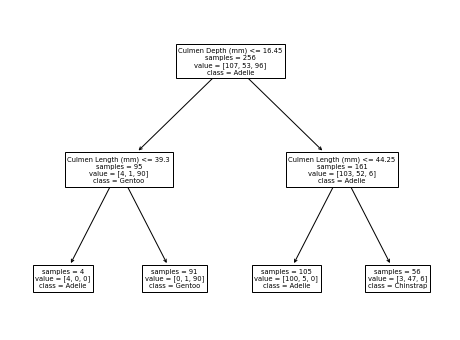

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=culmen_columns,
              class_names=tree.classes_, impurity=False, ax=ax)

Answer: We did! In level 1 :)

Compute the accuracy of the decision tree on the testing data.

In [ ]:
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.97


# Exercise 2

First, create two models, a linear regression model and a decision tree regression model, and fit them on the training data. Limit the depth at 3 levels for the decision tree.



In [ ]:
# Linear model
from sklearn.linear_model import LinearRegression

penguins = pd.read_csv("penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]


linear_model = LinearRegression()
linear_model.fit(data_train, target_train)


tree = DecisionTreeClassifier(max_depth=3)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=3)

Create a synthetic dataset containing all possible flipper length from the minimum to the maximum of the training dataset. Get the predictions of each model using this dataset.

In [ ]:
data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),
                                   data_train[feature_name].max()),
                                   columns=[feature_name])

# Predict Linear on the synthetic data set
target_predicted_linear = linear_model.predict(data_test)


# Predict Tree on the synthetic data set
target_predicted_tree = tree.predict(data_test)

Create a scatter plot containing the training samples and superimpose the predictions of both models on the top.



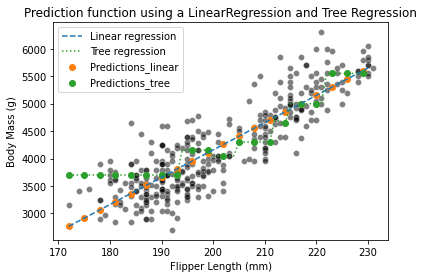

In [ ]:
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted_linear, label="Linear regression",
         linestyle="--")
plt.plot(data_test[feature_name], target_predicted_tree, label="Tree regression",
         linestyle=":",
            color="tab:green")
plt.scatter(data_test[::3], target_predicted_linear[::3], label="Predictions_linear",
            color="tab:orange")
plt.scatter(data_test[::3], target_predicted_tree[::3], label="Predictions_tree",
            color="tab:green")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression and Tree Regression")

Create a dataset containing values below and above the minimum and the maximum of the flipper length seen during training.



In [ ]:
data_test_outsidebounds = pd.DataFrame(np.arange(data_train[feature_name].min()-10,
                                   data_train[feature_name].max()+10),
                                   columns=[feature_name])

Finally, make predictions with both models on this new interval of data. Repeat the plotting of the previous exercise.



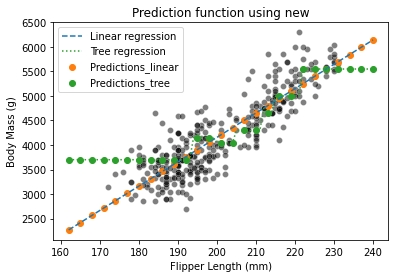

In [ ]:
## Predict Linear on the synthetic data set
target_predicted_linear_ob = linear_model.predict(data_test_outsidebounds)


# Predict Tree on the synthetic data set
target_predicted_tree_ob = tree.predict(data_test_outsidebounds)


ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
plt.plot(data_test_outsidebounds[feature_name], target_predicted_linear_ob, label="Linear regression",
         linestyle="--")
plt.plot(data_test_outsidebounds[feature_name], target_predicted_tree_ob, label="Tree regression",
         linestyle=":",
            color="tab:green")
plt.scatter(data_test_outsidebounds[::3], target_predicted_linear_ob[::3], label="Predictions_linear",
            color="tab:orange")
plt.scatter(data_test_outsidebounds[::3], target_predicted_tree_ob[::3], label="Predictions_tree",
            color="tab:green")
plt.legend()
_ = plt.title("Prediction function using new")

# Exercise 3

In [ ]:
# Use this data

import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

Create a random forest containing three trees. Train the forest and check the generalization performance on the testing set in terms of mean absolute error.



In [80]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector

categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

#random_forest = make_pipeline(
#    preprocessor,
#    RandomForestClassifier(n_estimators=3, random_state=0)
#)
random_forest = RandomForestClassifier(n_estimators=3, random_state=0)
random_forest.fit(data_train.values, target_train)

from sklearn import metrics

pred_test = random_forest.predict(data_test.values)
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, pred_test))

Mean Absolute Error: 457.2674418604651


We now aim to plot the predictions from the individual trees in the forest. For that purpose you have to create first a new dataset containing evenly spaced values for the flipper length over the interval between 170 mm and 230 mm.

In [81]:
data_test_reg = pd.DataFrame(np.arange(170,
                                   231),
                                   columns=[feature_name])

data_test_reg.head()

,Flipper Length (mm)
0,170
1,171
2,172
3,173
4,174


The trees contained in the forest that you created can be accessed with the attribute estimators_. Use them to predict the body mass corresponding to the values in this newly created dataset. Similarly find the predictions of the random forest in this dataset.

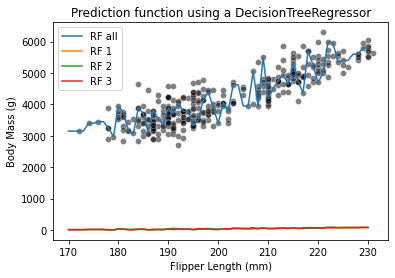

In [ ]:
# Predict Tree on the regular data set
target_predicted_reg = random_forest.predict(data_test_reg.values)
target_predicted_reg0 = random_forest.estimators_[0].predict(data_test_reg.values)
target_predicted_reg1 = random_forest.estimators_[1].predict(data_test_reg.values)
target_predicted_reg2 = random_forest.estimators_[2].predict(data_test_reg.values)


sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test_reg[feature_name], target_predicted_reg, label="RF all")
plt.plot(data_test_reg[feature_name], target_predicted_reg0, label="RF 1")
plt.plot(data_test_reg[feature_name], target_predicted_reg1, label="RF 2")
plt.plot(data_test_reg[feature_name], target_predicted_reg2, label="RF 3")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

In [78]:
random_forest.estimators_[2].predict([[0]])

array([7.])

In [82]:
random_forest.predict([[0]])

array([3150.])

In [83]:
target_predicted_reg

array([3150., 3150., 3150., 3150., 3400., 3400., 3450., 3450., 3250.,
       2975., 3950., 3750., 3150., 3075., 3900., 3700., 3100., 3800.,
       3525., 3350., 3900., 3700., 4050., 3775., 3775., 3325., 3500.,
       4150., 4400., 3900., 3400., 4050., 3800., 4625., 4625., 3950.,
       3950., 5050., 3950., 5500., 4200., 4500., 4750., 4950., 4650.,
       5300., 4725., 4375., 5700., 5250., 4700., 5000., 6000., 5950.,
       5350., 5400., 5400., 5600., 5600., 5800., 5800.])

In [84]:
target_predicted_reg0

array([ 7.,  7.,  7.,  7., 15., 15., 15.,  1.,  1.,  2., 27., 24.,  9.,
        5., 34., 27.,  4., 31.,  1.,  9., 27., 27., 19., 17., 21., 10.,
       19., 43., 30., 30., 35., 35., 15., 37., 37., 50., 35., 67., 35.,
       75., 44., 49., 57., 54., 47., 72., 55., 46., 79., 71., 55., 72.,
       61., 61., 73., 74., 74., 77., 77., 80., 79.])